# The Sparks Foundation :- GRIP <Task 1>
### Topic :- Prediction Using Supervised ML

### Author :- Abhishek Sachin Deshmukh

### Simple Linear Regression
* In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading Data from given Link

df = pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")

Data Imported Successfully


In [3]:
# Taking Overlook of Dataset

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Checking the description and facts of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Converting 'int64' data-type to float

df['Scores'] = df['Scores'].astype(np.float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [7]:
# Checking for any null values present in Dataset

df.isnull().any()

Hours     False
Scores    False
dtype: bool

##### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script :-

Text(0, 0.5, 'Percentage')

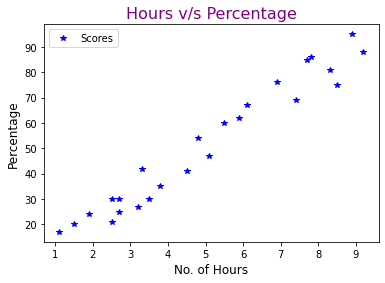

In [8]:
# Plotting the distribution of scores using Line_plot

df.plot(x='Hours', y='Scores', style='*', color='blue')
plt.title("Hours v/s Percentage", color='purple', size=16)
plt.xlabel("No. of Hours", size=12)
plt.ylabel("Percentage",size=12)

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Text(0, 0.5, 'Percentage')

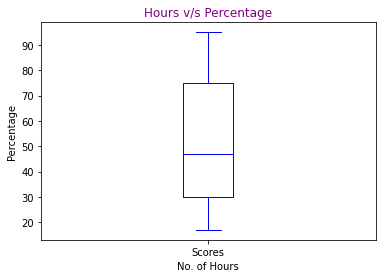

In [9]:
# Plotting the distribution of scores using Box_Plot

df.plot(x='Hours', y='Scores', kind='box', color='blue')
plt.title("Hours v/s Percentage", color='purple')
plt.xlabel("No. of Hours")
plt.ylabel("Percentage")

<AxesSubplot:>

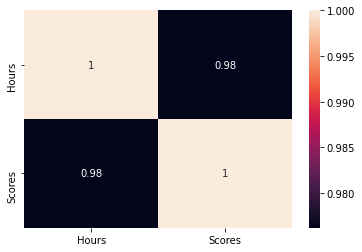

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## Preparing the data :-

 ##### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [11]:
X = df[['Hours']]
y = df[['Scores']]

* Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
* We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Training the Algorithm

##### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)
print("Training Completed")

Training Completed


##  Plotting the regression line

In [15]:
line = lr.coef_*X+lr.intercept_

## Plotting for the test data

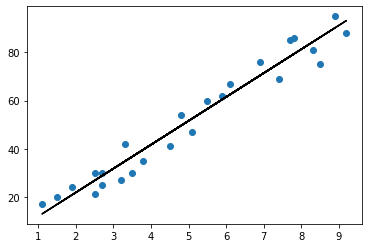

In [16]:
plt.scatter(X,y)
plt.plot(X,line, color='black')

## Making Predictions

###### Now that we have trained our algorithm, it's time to make some predictions

In [17]:
y_pred = lr.predict(X_test)
print(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [47]:
data = {'Actual' : [y_test], 'Predicted' : [y_pred]}
df1 = pd.DataFrame(data=data)
df1

,Actual,Predicted
0,Scores 5 20.0 2 27.0 19 69.0 16...,"[[16.884144762398048], [33.73226077948985], [7..."


 #####  You can also test with your own data

In [50]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


## Evaluating the model

* The final step is to evaluate the performance of algorithm. 
* This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [19]:
from sklearn import metrics

In [20]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## Predicting Scores using our model

In [21]:
lr.predict([[5]])

array([[51.57144244]])

In [22]:
lr.predict([[8]])

array([[81.30341189]])